In [ ]:
#In this code Multilingual dataset is used along with text preprocessing, tokenization, tfidf vectorization. 5-6 models are already added

In [2]:
# Array
import numpy as np

# Dataframe
import pandas as pd

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# warnings
import warnings
warnings.filterwarnings('ignore')

#Data Reading
data= pd.read_csv(r'D:\StressDetection\sentiment_analysis_term_train.csv')

# Copy
stress=data.copy()

# Data
stress.head()

,text,label
0,हमें इससे बेहतर ब्राइटनेस वाले टेबलेट देखने को...,neg
1,बैटरी लाइफ बहुत बढिया है।,pos
2,हकीकत ये है कि मेटल के नाम पर फोन में सिर्फ चा...,neu
3,स्लोफो एक मनोरंजक एप्लिकेशन है इसमें कोई दो रा...,pos
4,अच्छी बैटरी क्षमता है।,pos


In [3]:
# Info
stress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2497 entries, 0 to 2496
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2497 non-null   object
 1   label   2497 non-null   object
dtypes: object(2)
memory usage: 39.1+ KB


In [4]:
# Checking null values
stress.isnull().sum()

text     0
label    0
dtype: int64

In [5]:
# Statistical Information
stress.describe()

,text,label
count,2497,2497
unique,2497,3
top,हमें इससे बेहतर ब्राइटनेस वाले टेबलेट देखने को...,pos
freq,1,1147


In [6]:
import pandas as pd
from transformers import MarianMTModel, MarianTokenizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [7]:
model_name = "Helsinki-NLP/opus-mt-mul-en"
tokenizer = MarianTokenizer.from_pretrained(model_name)
model = MarianMTModel.from_pretrained(model_name)

In [8]:
# Translate text from any supported language to English
def translate(text, source_lang="auto"):
    try:
        inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, source_lang=source_lang)
        outputs = model.generate(**inputs)
        translated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
        return translated_text
    except Exception as e:
        print(f"Translation error: {e}")
        return None

In [9]:
# Delete rows with 'neu' label
data = data[data['label'] != 'neu']

# Convert 'pos' to 1 and 'neg' to 0
data['label'] = data['label'].map({'pos': 1, 'neg': 0})

# Print the resulting DataFrame
data.head()

,text,label
0,हमें इससे बेहतर ब्राइटनेस वाले टेबलेट देखने को...,0
1,बैटरी लाइफ बहुत बढिया है।,1
3,स्लोफो एक मनोरंजक एप्लिकेशन है इसमें कोई दो रा...,1
4,अच्छी बैटरी क्षमता है।,1
5,बैटरी लाइफ की बात करें तो हमारे लगातार वीडियो ...,1


In [10]:
# Replace the 'text' column with translated English text
data['text'] = data['text'].apply(lambda x: translate(x, source_lang="hi"))

# Remove rows with translation errors
data = data.dropna(subset=['text'])

Keyword arguments {'source_lang': 'hi'} not recognized.
Keyword arguments {'source_lang': 'hi'} not recognized.
Keyword arguments {'source_lang': 'hi'} not recognized.
Keyword arguments {'source_lang': 'hi'} not recognized.
Keyword arguments {'source_lang': 'hi'} not recognized.
Keyword arguments {'source_lang': 'hi'} not recognized.
Keyword arguments {'source_lang': 'hi'} not recognized.
Keyword arguments {'source_lang': 'hi'} not recognized.
Keyword arguments {'source_lang': 'hi'} not recognized.
Keyword arguments {'source_lang': 'hi'} not recognized.
Keyword arguments {'source_lang': 'hi'} not recognized.
Keyword arguments {'source_lang': 'hi'} not recognized.
Keyword arguments {'source_lang': 'hi'} not recognized.
Keyword arguments {'source_lang': 'hi'} not recognized.
Keyword arguments {'source_lang': 'hi'} not recognized.
Keyword arguments {'source_lang': 'hi'} not recognized.
Keyword arguments {'source_lang': 'hi'} not recognized.
Keyword arguments {'source_lang': 'hi'} not reco

KeyboardInterrupt: 

In [10]:
# Array
import numpy as np

# Dataframe
import pandas as pd

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# warnings
import warnings
warnings.filterwarnings('ignore')

#Data Reading
stress_c= pd.read_csv(r'C:\Users\DELL\Desktop\Language_translator\Stress.csv')

# Copy
stress=stress_c.copy()

# Data
stress.head()

,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",1,0.8,1521614353
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",0,1.0,1527009817
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,1,0.8,1535935605
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",1,0.6,1516429555
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1,0.8,1539809005


In [11]:
# Select only 'text' and 'label' columns
stress = stress[['text', 'label']]

# Print the resulting DataFrame
stress.head()

,text,label
0,"He said he had not felt that way before, sugge...",1
1,"Hey there r/assistance, Not sure if this is th...",0
2,My mom then hit me with the newspaper and it s...,1
3,"until i met my new boyfriend, he is amazing, h...",1
4,October is Domestic Violence Awareness Month a...,1


In [12]:
# Concatenate the rows of 'stree' onto 'data'
merged_data = pd.concat([data, stress], ignore_index=True)

# Print the concatenated DataFrame
print(merged_data)

                                                   text  label
0       We've got a better view of the Britneys tablet.      0
1                   The battery is now fully recharged.      1
2     Slofo is a entertainment application that has ...      1
3                                Good battery capacity.      1
4     When we talk about battery life, our constant ...      1
...                                                 ...    ...
4331  * Her, a week ago: Precious, how are you? (I i...      0
4332  I don't have the ability to cope with it anymo...      1
4333  In case this is the first time you're reading ...      0
4334  Do you find this normal? They have a good rela...      0
4335  I was talking to my mom this morning and she s...      1

[4336 rows x 2 columns]


In [13]:
# Calculate the percentage of each label
label_counts = merged_data['label'].value_counts(normalize=True) * 100

# Print the percentage of each label
print("Percentage of label 0:", label_counts[0])
print("Percentage of label 1:", label_counts[1])

Percentage of label 0: 39.22970479704797
Percentage of label 1: 60.77029520295203


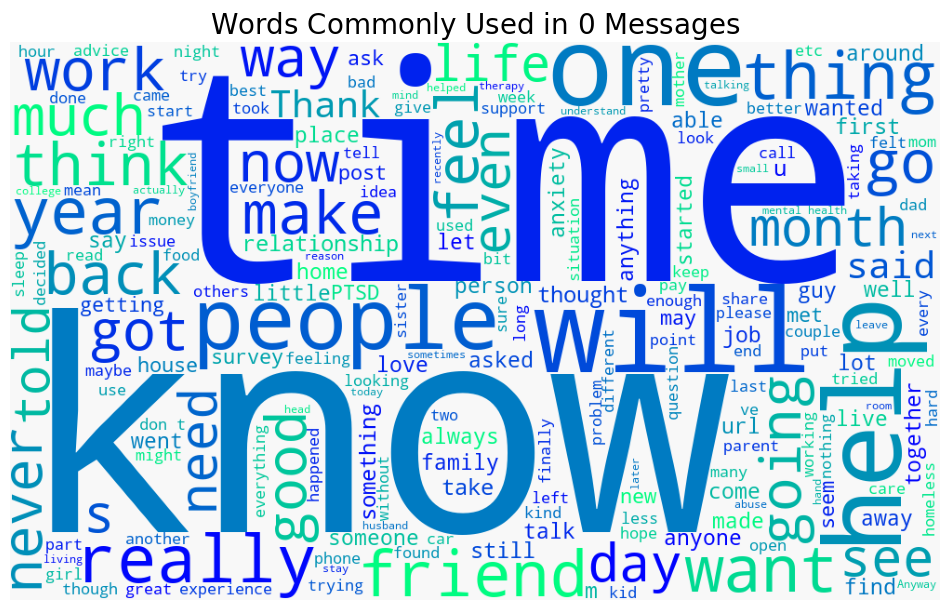

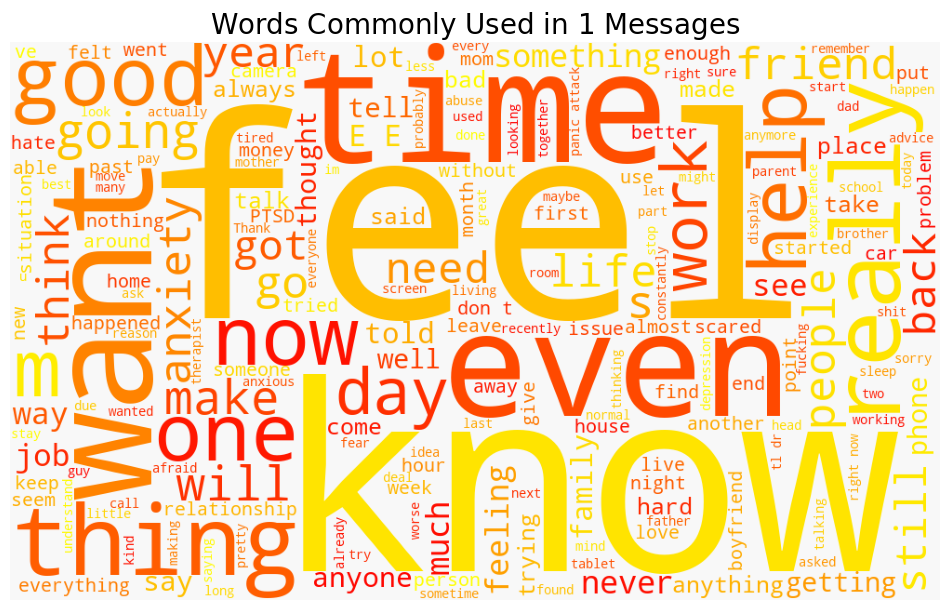

In [19]:
for label, cmap in zip([0,1],
                       ['winter', 'autumn', 'magma', 'viridis', 'plasma']):
    text = merged_data.query('label == @label')['text'].str.cat(sep=' ')
    plt.figure(figsize=(12, 9))
    wc = WordCloud(width=1000, height=600, background_color="#f8f8f8", colormap=cmap)
    wc.generate_from_text(text)
    plt.imshow(wc)
    plt.axis("off")
    plt.title(f"Words Commonly Used in ${label}$ Messages", size=20)
    plt.show()

In [18]:
# Regular Expression
import re 

# Handling string
import string

# NLP tool
import spacy

nlp=spacy.load('en_core_web_sm')
from spacy.lang.en.stop_words import STOP_WORDS

# Importing Natural Language Tool Kit for NLP operations
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')                                
from nltk.stem import WordNetLemmatizer

from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from collections import Counter

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [20]:
#defining function for preprocessing
def preprocess(text,remove_digits=True):
    text = re.sub('\W+',' ', text)                                       
    text = re.sub('\s+',' ', text)                                       
    text = re.sub("(?<!\w)\d+", "", text)                                
    text = re.sub("-(?!\w)|(?<!\w)-", "", text)                          
    text=text.lower()
    nopunc=[char for char in text if char not in string.punctuation]    
    nopunc=''.join(nopunc)
    nopunc=' '.join([word for word in nopunc.split()
               if word.lower() not in stopwords.words('english')])  
    
    
    return nopunc
# Defining a function for lemitization
def lemmatize(words):
   
    words=nlp(words)
    lemmas = []
    for word in words:
        
        lemmas.append(word.lemma_)
    return lemmas



#converting them into string
def listtostring(s):
    str1=' '
    return (str1.join(s))

def clean_text(input):
    word=preprocess(input)
    lemmas=lemmatize(word)
    return listtostring(lemmas)

In [21]:
# Creating a feature to store clean texts
merged_data['clean_text']=merged_data['text'].apply(clean_text)
merged_data.head()

,text,label,clean_text
0,We've got a better view of the Britneys tablet.,0,get well view britney tablet
1,The battery is now fully recharged.,1,battery fully recharge
2,Slofo is a entertainment application that has ...,1,slofo entertainment application two opinion st...
3,Good battery capacity.,1,good battery capacity
4,"When we talk about battery life, our constant ...",1,talk battery life constant video playback test...


In [22]:
# Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

# Model Building
from sklearn.model_selection import GridSearchCV,StratifiedKFold,KFold,train_test_split,cross_val_score,cross_val_predict
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn import preprocessing
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier,RandomForestClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

#Model Evaluation
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score,precision_score
from sklearn.pipeline import Pipeline

# Time
from time import time

In [23]:
# Defining target & feature for ML model building
x=merged_data['clean_text']
y=merged_data['label']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [24]:
# Self-defining function to convert the data into vector form by tf idf 
#vectorizer and classify and create model by Logistic regression

def model_lr_tf(x_train, x_test, y_train, y_test):
    global acc_lr_tf,f1_lr_tf
    # Text to vector transformation 
    vector = TfidfVectorizer()
    x_train = vector.fit_transform(x_train)
    x_test = vector.transform(x_test)
 
    ovr = LogisticRegression()
    
    #fitting training data into the model & predicting
    t0 = time()

    ovr.fit(x_train, y_train)
    
    y_pred = ovr.predict(x_test)
    
    # Model Evaluation
    
    conf=confusion_matrix(y_test,y_pred)
    acc_lr_tf=accuracy_score(y_test,y_pred)
    f1_lr_tf=f1_score(y_test,y_pred,average='weighted')
    print('Time :',time()-t0)
    print('Accuracy: ',acc_lr_tf)
    print(10*'===========')
    print('Confusion Matrix: \n',conf)
    print(10*'===========')
    print('Classification Report: \n',classification_report(y_test,y_pred))
    
    
    return y_test,y_pred,acc_lr_tf

In [25]:
# Self defining function to convert the data into vector form by tf idf 
#vectorizer and classify and create model by MultinomialNB

def model_nb_tf(x_train, x_test, y_train, y_test):
    global acc_nb_tf,f1_nb_tf
    # Text to vector transformation 
    vector = TfidfVectorizer()
    x_train = vector.fit_transform(x_train)
    x_test = vector.transform(x_test)

    ovr = MultinomialNB()
    
    #fitting training data into the model & predicting
    t0 = time()
    
    ovr.fit(x_train, y_train)
    
    y_pred = ovr.predict(x_test)
    
    # Model Evaluation
    
    conf=confusion_matrix(y_test,y_pred)
    acc_nb_tf=accuracy_score(y_test,y_pred)
    f1_nb_tf=f1_score(y_test,y_pred,average='weighted')
    print('Time : ',time()-t0)
    print('Accuracy: ',acc_nb_tf)
    print(10*'===========')
    print('Confusion Matrix: \n',conf)
    print(10*'===========')
    print('Classification Report: \n',classification_report(y_test,y_pred))
    
    
    return y_test,y_pred,acc_nb_tf


In [26]:
# Self defining function to convert the data into vector form by tf idf
# vectorizer and classify and create model by Decision Tree
def model_dt_tf(x_train, x_test, y_train, y_test):
    global acc_dt_tf,f1_dt_tf
    # Text to vector transformation 
    vector = TfidfVectorizer()
    x_train = vector.fit_transform(x_train)
    x_test = vector.transform(x_test)
    

    ovr = DecisionTreeClassifier(random_state=1)
    
    #fitting training data into the model & predicting
    t0 = time()
    
    ovr.fit(x_train, y_train)
    
    y_pred = ovr.predict(x_test)
    
    # Model Evaluation
    
    conf=confusion_matrix(y_test,y_pred)
    acc_dt_tf=accuracy_score(y_test,y_pred)
    f1_dt_tf=f1_score(y_test,y_pred,average='weighted')
    print('Time : ',time()-t0)
    print('Accuracy: ',acc_dt_tf)
    print(10*'===========')
    print('Confusion Matrix: \n',conf)
    print(10*'===========')
    print('Classification Report: \n',classification_report(y_test,y_pred))
    
    
    return y_test,y_pred,acc_dt_tf

In [27]:
# Self defining function to convert the data into vector form by tf idf 
#vectorizer and classify and create model by KNN

def model_knn_tf(x_train, x_test, y_train, y_test):
    global acc_knn_tf,f1_knn_tf
    # Text to vector transformation 
    vector = TfidfVectorizer()
    x_train = vector.fit_transform(x_train)
    x_test = vector.transform(x_test)
    

    ovr = KNeighborsClassifier()
    
    #fitting training data into the model & predicting
    t0 = time()
    
    ovr.fit(x_train, y_train)
    
    y_pred = ovr.predict(x_test)
    
    # Model Evaluation
    
    conf=confusion_matrix(y_test,y_pred)
    acc_knn_tf=accuracy_score(y_test,y_pred)
    f1_knn_tf=f1_score(y_test,y_pred,average='weighted')
    print('Time : ',time()-t0)
    print('Accuracy: ',acc_knn_tf)
    print(10*'===========')
    print('Confusion Matrix: \n',conf)
    print(10*'===========')
    print('Classification Report: \n',classification_report(y_test,y_pred))


In [28]:
# Self defining function to convert the data into vector form by tf idf 
#vectorizer and classify and create model by Random Forest

def model_rf_tf(x_train, x_test, y_train, y_test):
    global acc_rf_tf,f1_rf_tf
    # Text to vector transformation 
    vector = TfidfVectorizer()
    x_train = vector.fit_transform(x_train)
    x_test = vector.transform(x_test)

    ovr = RandomForestClassifier(random_state=1)
    
    #fitting training data into the model & predicting
    t0 = time()
    
    ovr.fit(x_train, y_train)
    
    y_pred = ovr.predict(x_test)
    
    # Model Evaluation
    
    conf=confusion_matrix(y_test,y_pred)
    acc_rf_tf=accuracy_score(y_test,y_pred)
    f1_rf_tf=f1_score(y_test,y_pred,average='weighted')
    print('Time : ',time()-t0)
    print('Accuracy: ',acc_rf_tf)
    print(10*'===========')
    print('Confusion Matrix: \n',conf)
    print(10*'===========')
    print('Classification Report: \n',classification_report(y_test,y_pred))


In [29]:
# Self defining function to convert the data into vector form by tf idf
# vectorizer and classify and create model by Adaptive Boosting

def model_ab_tf(x_train, x_test, y_train, y_test):
    global acc_ab_tf,f1_ab_tf
    # Text to vector transformation 
    vector = TfidfVectorizer()
    x_train = vector.fit_transform(x_train)
    x_test = vector.transform(x_test)
    

    
    ovr = AdaBoostClassifier(random_state=1)
    
    #fitting training data into the model & predicting
    t0 = time()
    
    ovr.fit(x_train, y_train)
    
    y_pred = ovr.predict(x_test)
    
    # Model Evaluation
    
    conf=confusion_matrix(y_test,y_pred)
    acc_ab_tf=accuracy_score(y_test,y_pred)
    f1_ab_tf=f1_score(y_test,y_pred,average='weighted')
    print('Time : ',time()-t0)
    print('Accuracy: ',acc_ab_tf)
    print(10*'===========')
    print('Confusion Matrix: \n',conf)
    print(10*'===========')
    print('Classification Report: \n',classification_report(y_test,y_pred))

In [30]:
# Evaluating Models

print('********************Logistic Regression*********************')
print('\n')
model_lr_tf(x_train, x_test, y_train, y_test)
print('\n')
print(30*'==========')
print('\n')
print('********************Multinomial NB*********************')
print('\n')
model_nb_tf(x_train, x_test, y_train, y_test)
print('\n')
print(30*'==========')
print('\n')
print('********************Decision Tree*********************')
print('\n')
model_dt_tf(x_train, x_test, y_train, y_test)
print('\n')
print(30*'==========')
print('\n')
print('********************KNN*********************')
print('\n')
model_knn_tf(x_train, x_test, y_train, y_test)
print('\n')
print(30*'==========')
print('\n')
print('********************Random Forest Bagging*********************')
print('\n')
model_rf_tf(x_train, x_test, y_train, y_test)
print('\n')
print(30*'==========')
print('\n')
print('********************Adaptive Boosting*********************')
print('\n')
model_ab_tf(x_train, x_test, y_train, y_test)
print('\n')
print(30*'==========')
print('\n')

********************Logistic Regression*********************


Time : 0.4748508930206299
Accuracy:  0.717741935483871
Confusion Matrix: 
 [[168 165]
 [ 80 455]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.68      0.50      0.58       333
           1       0.73      0.85      0.79       535

    accuracy                           0.72       868
   macro avg       0.71      0.68      0.68       868
weighted avg       0.71      0.72      0.71       868





********************Multinomial NB*********************


Time :  0.025384187698364258
Accuracy:  0.6923963133640553
Confusion Matrix: 
 [[ 82 251]
 [ 16 519]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.25      0.38       333
           1       0.67      0.97      0.80       535

    accuracy                           0.69       868
   macro avg       0.76      0.61      0.59       868
weighted avg       0.74   

In [31]:
# Creating tabular format for better comparison
tbl=pd.DataFrame()
tbl['Model']=pd.Series(['Logistic Regresion','Multinomial NB',
            'Decision Tree','KNN','Random Forest','Adaptive Boosting'])
tbl['Accuracy']=pd.Series([acc_lr_tf,acc_nb_tf,acc_dt_tf,acc_knn_tf,
                  acc_rf_tf,acc_ab_tf])
tbl['F1_Score']=pd.Series([f1_lr_tf,f1_nb_tf,f1_dt_tf,f1_knn_tf,
                  f1_rf_tf,f1_ab_tf])
tbl.set_index('Model')
# Best model on the basis of F1 Score
tbl.sort_values('F1_Score',ascending=False)

,Model,Accuracy,F1_Score
0,Logistic Regresion,0.717742,0.707481
4,Random Forest,0.711982,0.705370
3,KNN,0.690092,0.680913
5,Adaptive Boosting,0.678571,0.669394
1,Multinomial NB,0.692396,0.636233
2,Decision Tree,0.629032,0.631070



 LogisticRegression()
f1-Score(train): mean= (0.684), min=(0.682)) ,max= (0.687),stdev= (0.002)
f1-Score(test): 0.6839

 MultinomialNB()
f1-Score(train): mean= (0.601), min=(0.590)) ,max= (0.622),stdev= (0.011)
f1-Score(test): 0.6015

 DecisionTreeClassifier(random_state=1)
f1-Score(train): mean= (0.611), min=(0.594)) ,max= (0.639),stdev= (0.016)
f1-Score(test): 0.6110

 KNeighborsClassifier()
f1-Score(train): mean= (0.653), min=(0.646)) ,max= (0.664),stdev= (0.006)
f1-Score(test): 0.6534

 RandomForestClassifier(random_state=1)
f1-Score(train): mean= (0.678), min=(0.659)) ,max= (0.692),stdev= (0.011)
f1-Score(test): 0.6779

 AdaBoostClassifier(random_state=1)
f1-Score(train): mean= (0.654), min=(0.628)) ,max= (0.676),stdev= (0.017)
f1-Score(test): 0.6549


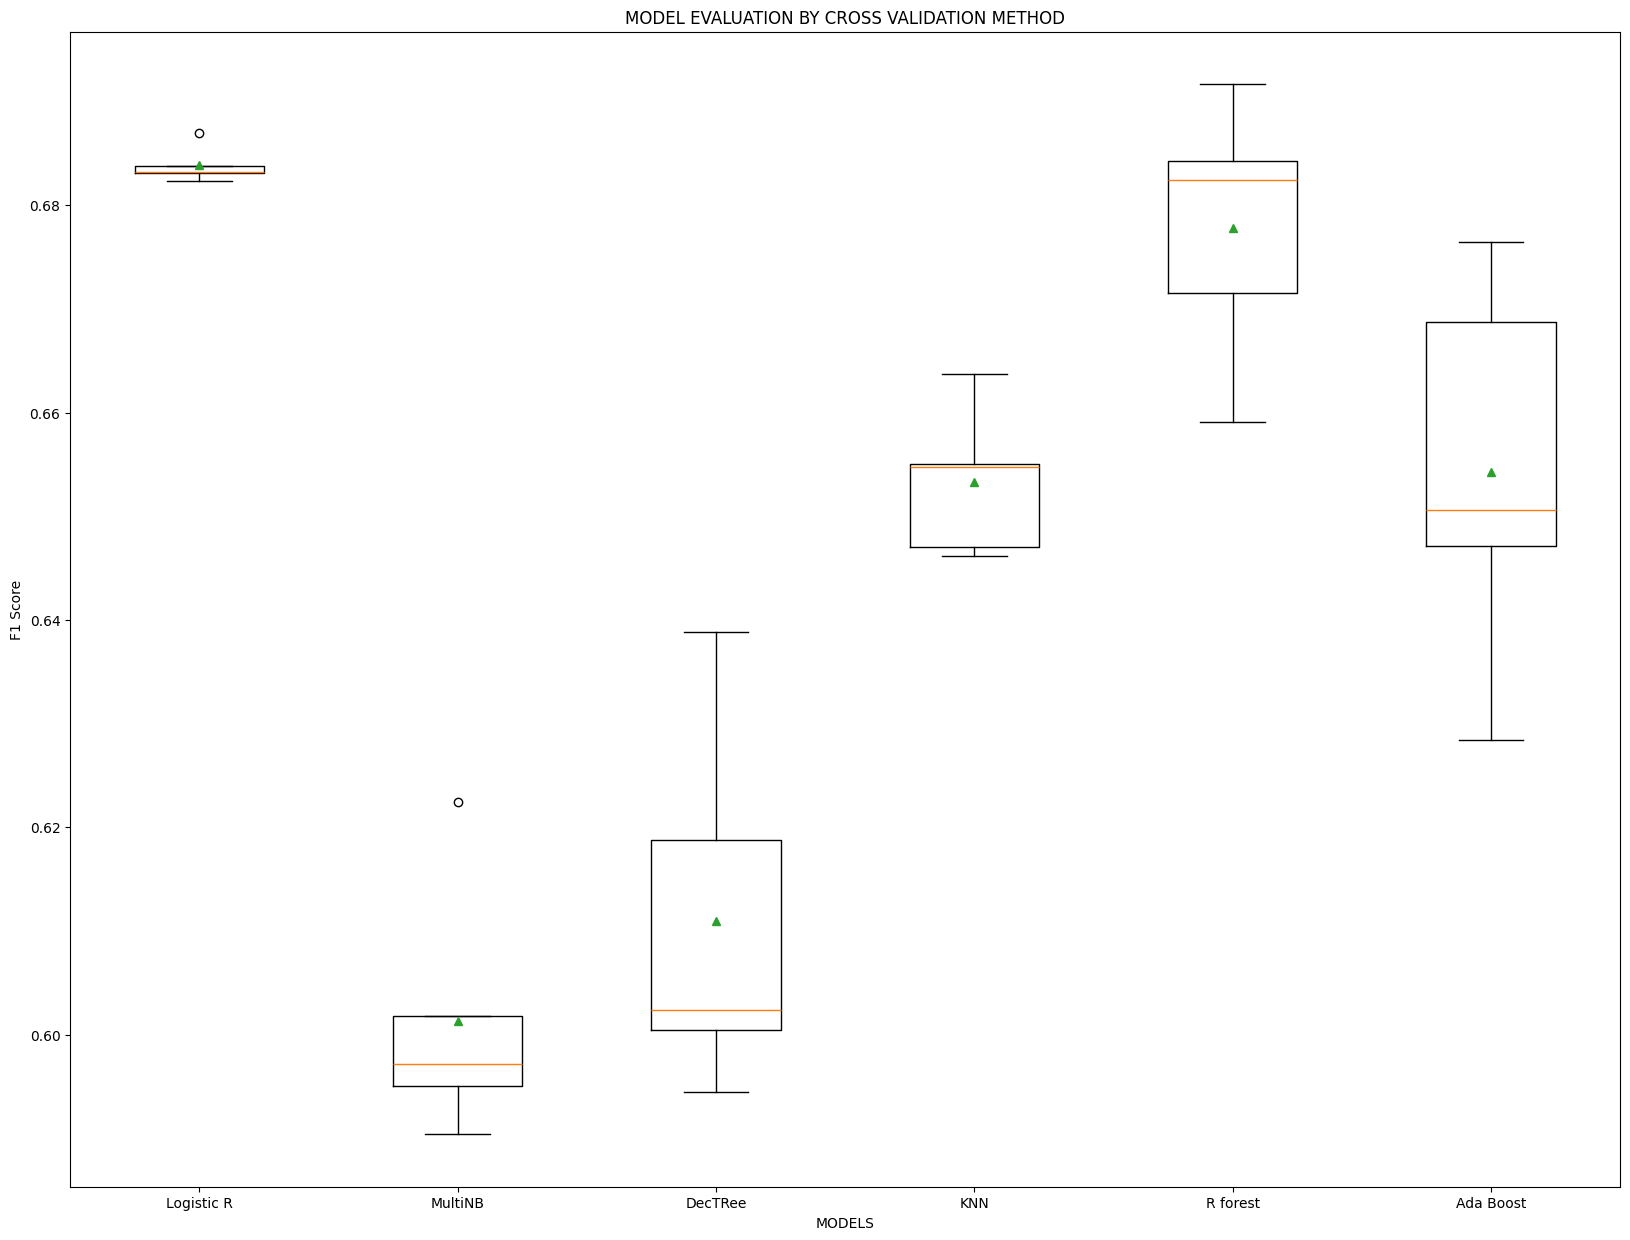

In [32]:
# Using cross validation method to avoid overfitting
import statistics as st
vector = TfidfVectorizer()

x_train_v = vector.fit_transform(x_train)
x_test_v  = vector.transform(x_test)

# Model building
lr =LogisticRegression()
mnb=MultinomialNB()
dct=DecisionTreeClassifier(random_state=1)
knn=KNeighborsClassifier()
rf=RandomForestClassifier(random_state=1)
ab=AdaBoostClassifier(random_state=1)
m  =[lr,mnb,dct,knn,rf,ab]
model_name=['Logistic R','MultiNB','DecTRee','KNN','R forest','Ada Boost']

results, mean_results, p, f1_test=list(),list(),list(),list()


#Model fitting,cross-validating and evaluating performance

def algor(model):
    print('\n',i)
    pipe=Pipeline([('model',model)])
    pipe.fit(x_train_v,y_train)
    cv=StratifiedKFold(n_splits=5)
    n_scores=cross_val_score(pipe,x_train_v,y_train,scoring='f1_weighted',
                  cv=cv,n_jobs=-1,error_score='raise') 
    results.append(n_scores)
    mean_results.append(st.mean(n_scores))
    print('f1-Score(train): mean= (%.3f), min=(%.3f)) ,max= (%.3f),stdev= (%.3f)'%(st.mean(n_scores), min(n_scores),max(n_scores),np.std(n_scores)))
    y_pred=cross_val_predict(model,x_train_v,y_train,cv=cv)
    p.append(y_pred)
    f1=f1_score(y_train,y_pred, average = 'weighted')
    f1_test.append(f1)
    print('f1-Score(test): %.4f'%(f1))

for i in m:
    algor(i)


# Model comparison By Visualizing 

fig=plt.subplots(figsize=(20,15))
plt.title('MODEL EVALUATION BY CROSS VALIDATION METHOD')
plt.xlabel('MODELS')
plt.ylabel('F1 Score')
plt.boxplot(results,labels=model_name,showmeans=True)
plt.show()

In [33]:
x=merged_data['clean_text']
y=merged_data['label']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

vector = TfidfVectorizer()
x_train = vector.fit_transform(x_train)
x_test = vector.transform(x_test)
model_lr_tf=LogisticRegression()

model_lr_tf.fit(x_train,y_train)
y_pred=model_lr_tf.predict(x_test)
# Model Evaluation
    
conf=confusion_matrix(y_test,y_pred)
acc_lr=accuracy_score(y_test,y_pred)
f1_lr=f1_score(y_test,y_pred,average='weighted')

print('Accuracy: ',acc_lr)
print('F1 Score: ',f1_lr)
print(10*'===========')
print('Confusion Matrix: \n',conf)
print(10*'===========')
print('Classification Report: \n',classification_report(y_test,y_pred))

Accuracy:  0.717741935483871
F1 Score:  0.7074809501937368
Confusion Matrix: 
 [[168 165]
 [ 80 455]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.68      0.50      0.58       333
           1       0.73      0.85      0.79       535

    accuracy                           0.72       868
   macro avg       0.71      0.68      0.68       868
weighted avg       0.71      0.72      0.71       868

